In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
sns.set_style("whitegrid")

In [113]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    # else:
        # print('Confusion matrix, without normalization')

    # print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    return fig,ax

# 1 - Modelo de Classificação Linear

In [2]:
# Inicialização do LDA
lda = LinearDiscriminantAnalysis()

In [3]:
# Carregando conjunto de treino e teste
x_treino = pd.read_excel('Homework03/hw3-data/treino_unskew.xlsx',index_col=False)
x_teste = pd.read_excel('Homework03/hw3-data/teste_unskew.xlsx',index_col=False)
y_treino = pd.read_excel('Homework03/hw3-data/MOS_treino.xlsx',index_col= False)
y_teste = pd.read_excel('Homework03/hw3-data/MOS_teste.xlsx',index_col=False)
y_treino,y_teste = np.ravel(y_treino),np.ravel(y_teste)

In [4]:
lda.fit(x_treino,y_treino) # Treinando o LDA
pred = lda.predict(x_teste) # Testando o LDA
CM = confusion_matrix(y_teste,pred) # Cálculo da confusion matrix
pont = lda.score(x_teste,y_teste) # Cálculo da precisão
print(f'A análise de discriminante linear conseguiu prever {100*pont:.4}% das amostras')
print(f'\nConfusion Matrix: \n {CM}')

A análise de discriminante linear conseguiu prever 58.52% das amostras

Confusion Matrix: 
 [[1320  632   10    2   19]
 [ 192 1177    2    0    3]
 [ 126   25    3    0   24]
 [  21   83    0    3    1]
 [ 341  320   11    0   53]]


# 2 - Modelo de Classificação não Linear

## 2.1 - Análise de discriminante quadratico

In [5]:
#Inicialização do QDA
qda = QuadraticDiscriminantAnalysis()

In [6]:
qda.fit(x_treino,y_treino) # Treinando o QDA
pred_qda = qda.predict(x_teste) # Testando o QDA
CM_qda = confusion_matrix(y_teste,pred_qda) # Cálculo da confusion matrix
pont_qda = qda.score(x_teste,y_teste) # Cálculo da precisão
print(f'A análise de discriminante linear conseguiu prever {100*pont_qda:.4}% das amostras')
print(f'\nConfusion Matrix: \n {CM_qda}')

A análise de discriminante linear conseguiu prever 59.23% das amostras

Confusion Matrix: 
 [[1245  608   37   17   76]
 [ 191 1156    4   12   11]
 [  82   23   16    2   55]
 [  13   61    6   20    8]
 [ 234  307   29    5  150]]


## 2.2 - k-Nearest Neighbors

In [33]:
k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,35,41,45,51,55,61]
knn_ = []
#Inicialização dos KNN's com k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,35,41,45,51,55,61]
for i in k:
    knn_ = np.append(knn_,KNeighborsClassifier(n_neighbors=i))

In [38]:
pred_knn = np.zeros([len(x_teste),len(knn_)])
CM_knn = np.zeros([len(knn_),5,5])
pont_knn = np.zeros(len(knn_))
for i in range(len(knn_)):
    knn_[i].fit(x_treino,y_treino)
    pred_knn[:,i] = knn_[i].predict(x_teste)
    CM_knn[i,:,:] = confusion_matrix(y_teste,pred_knn[:,i])
    pont_knn[i] = knn_[i].score(x_teste,y_teste)

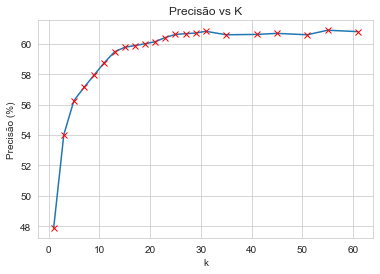

In [124]:
plt.figure(1)
plt.plot(k,pont_knn*100,'-',k,pont_knn*100,'rx')
plt.title('Precisão vs K')
plt.ylabel('Precisão (%)')
plt.xlabel('k')
plt.savefig('Homework03/hw3-fig/precisaoknn.png')
plt.show()

## 2.3 - Rede Neural

In [10]:
NW = MLPClassifier()

In [11]:
NW.fit(x_treino,y_treino)
pred_NW = NW.predict(x_teste)
CM_NW = confusion_matrix(y_teste,pred_NW)
pont_NW = NW.score(x_teste,y_teste)
print(f'A rede neural conseguiu prever {100*pont_NW:.4}% das amostras')
print(f'\nConfusion Matrix: \n {CM_NW}')

A rede neural conseguiu prever 61.26% das amostras

Confusion Matrix: 
 [[1265  603    0   12  103]
 [ 191 1160    0    9   14]
 [  83   20    1    3   71]
 [  14   59    0   24   11]
 [ 210  286    1    2  226]]


# 3. Comparação e CM normalizadas

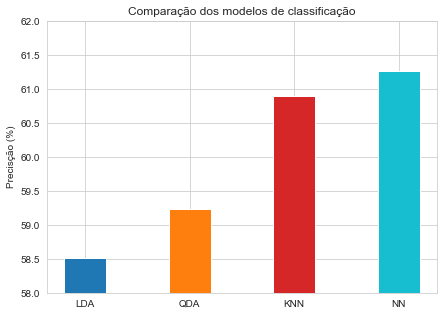

In [129]:
plt.figure(figsize=(7, 5))
plt.title('Comparação dos modelos de classificação')
bars = ['LDA','QDA','KNN','NN']
plt.bar(np.arange(len(bars)),(100*pont,100*pont_qda,100*max(pont_knn),100*pont_NW),0.4,color=['C0', 'C1', 'C3', 'C9'])
plt.xticks(np.arange(len(bars)),bars)
plt.ylim(58,62)
plt.ylabel('Precisção (%)')
plt.savefig('Homework03/hw3-fig/Comparation.png')
plt.show()

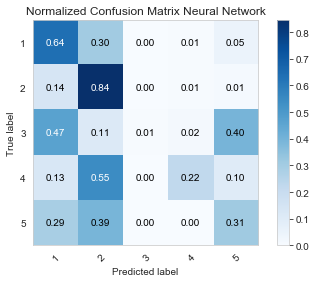

In [117]:
fig,ax=plot_confusion_matrix(y_teste,pred_NW,normalize=True,title='Normalized Confusion Matrix Neural Network',classes=['1','2','3','4','5'])
plt.grid()
plt.show()
fig.savefig('Homework03/hw3-fig/CMNN.png')

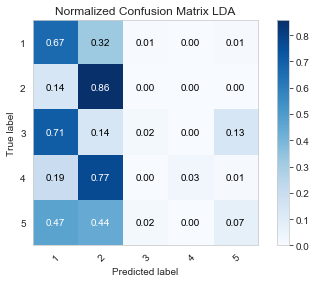

In [118]:
fig,ax=plot_confusion_matrix(y_teste,pred,normalize=True,title='Normalized Confusion Matrix LDA',classes=['1','2','3','4','5'])
plt.grid()
plt.show()
fig.savefig('Homework03/hw3-fig/CMLDA.png')

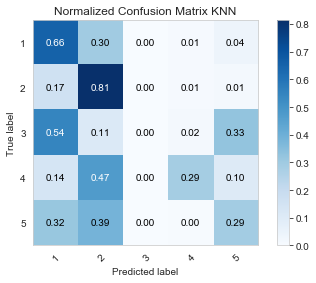

In [119]:
ii=np.argmax(pont_knn)
fig,ax=plot_confusion_matrix(y_teste,pred_knn[:,ii],normalize=True,title='Normalized Confusion Matrix KNN',classes=['1','2','3','4','5'])
plt.grid()
plt.show()
fig.savefig('Homework03/hw3-fig/CMKNN.png')

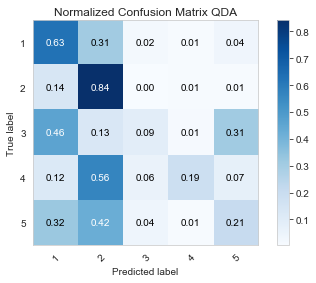

In [120]:
fig,ax=plot_confusion_matrix(y_teste,pred_qda,normalize=True,title='Normalized Confusion Matrix QDA',classes=['1','2','3','4','5'])
plt.grid()
plt.show()
fig.savefig('Homework03/hw3-fig/CMQDA.png')

In [128]:
max(pont_knn*100)

60.89743589743589